In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [30]:
df_trainval=pd.read_csv('/kaggle/input/titanic/train.csv')
df_trainval

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [31]:
train, val=train_test_split(df_trainval, random_state=0, test_size=0.1)

In [32]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S


In [33]:
val

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
648,649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,NaN,S
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5000,F33,S


In [34]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            158
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          622
Embarked         2
dtype: int64

In [35]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,801.000000,801.000000,801.000000,643.000000,801.000000,801.000000,801.000000
mean,443.604245,0.378277,2.330836,29.858865,0.520599,0.379526,31.222253
std,257.352253,0.485260,0.828650,14.548460,1.114624,0.811345,49.137957
min,1.000000,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,219.000000,0.000000,2.000000,20.750000,0.000000,0.000000,7.895800
50%,440.000000,0.000000,3.000000,28.500000,0.000000,0.000000,13.862500
75%,666.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
val.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            19
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          65
Embarked        0
dtype: int64

In [37]:
train.drop(['PassengerId','Name','Cabin','Ticket'], axis=1,inplace=True)
val.drop(['PassengerId','Name','Cabin','Ticket'], axis=1,inplace=True)


In [38]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         158
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [39]:
val.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         19
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [40]:
train.dropna(subset=['Embarked'], inplace=True)


In [41]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         158
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [42]:
x_train=train.drop(columns=['Survived'])
y_train=train['Survived']
x_val=val.drop(columns=['Survived'])
y_val=val['Survived']

In [43]:
pipe_numerical=make_pipeline(SimpleImputer(strategy='mean'),StandardScaler())

In [44]:
pipe_categorical=make_pipeline(OneHotEncoder(handle_unknown='ignore'))

In [45]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
815,0,1,male,NaN,0,0,0.0000,S
877,0,3,male,19.0,0,0,7.8958,S
193,1,2,male,3.0,1,1,26.0000,S
523,1,1,female,44.0,0,1,57.9792,C
634,0,3,female,9.0,3,2,27.9000,S


In [46]:
pipe_preprocessing = make_column_transformer(
    (pipe_numerical, ['Age', 'Fare']),
    (pipe_categorical, ['Sex','Pclass', 'SibSp', 'Parch', 'Embarked'])
)


In [47]:
param_grid_rfc= {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 5, 10],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],
}
param_grid_svc = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
}
param_grid_xgb= {
    'xgbclassifier__learning_rate': [0.1, 0.3, 0.5],
    'xgbclassifier__max_depth': [3, 5, 7],
    'xgbclassifier__n_estimators': [100, 200, 300],
}

param_grid_lr = {
    'logisticregression__C': [0.1, 1, 10],
    'logisticregression__solver': ['liblinear', 'lbfgs']
}

In [48]:
pipe_rfc = make_pipeline(pipe_preprocessing, RandomForestClassifier())
pipe_rfc.fit(x_train, y_train)

pipe_svc = make_pipeline(pipe_preprocessing, SVC(probability=True))  # Enable probability estimation
pipe_svc.fit(x_train, y_train)

pipe_xgb = make_pipeline(pipe_preprocessing, xgb.XGBClassifier()) 
pipe_xgb.fit(x_train, y_train)

pipe_lr= make_pipeline(pipe_preprocessing, LogisticRegression(max_iter=1000))
pipe_lr.fit(x_train, y_train)



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Pclass', 'SibSp',
                                                   'Parch', 'Embarked'])])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [49]:
x_train.shape

(799, 7)

In [50]:
y_train.shape

(799,)

In [51]:
x_val

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
495,3,male,NaN,0,0,14.4583,C
648,3,male,NaN,0,0,7.5500,S
278,3,male,7.0,4,1,29.1250,Q
31,1,female,NaN,1,0,146.5208,C
255,3,female,29.0,0,2,15.2458,C
...,...,...,...,...,...,...,...
627,1,female,21.0,0,0,77.9583,S
380,1,female,42.0,0,0,227.5250,C
483,3,female,63.0,0,0,9.5875,S
516,2,female,34.0,0,0,10.5000,S


In [52]:
y_val

495    0
648    0
278    0
31     1
255    1
      ..
627    1
380    1
483    1
516    1
505    0
Name: Survived, Length: 90, dtype: int64

In [53]:
grid_search_rfc= GridSearchCV(pipe_rfc, param_grid_rfc,cv=5)
grid_search_svc = GridSearchCV(pipe_svc, param_grid_svc, cv=5)
grid_search_xgb = GridSearchCV(pipe_xgb, param_grid_xgb, cv=5)
grid_search_lr= GridSearchCV(pipe_lr, param_grid_lr, cv=5)


In [54]:
grid_search_rfc.fit(x_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Sex',
                                                                          'Pclass',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Embarked'])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [None, 5, 10],
                         'randomforestclassifier__min_samples_leaf': [1, 2, 4],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [100, 200,
                                                                  300]})

In [55]:
grid_search_svc.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Sex',
                                                                          'Pclass',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Embarked'])])),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__kernel': ['linear', 'rbf']})

In [56]:
grid_search_xgb.fit(x_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Sex',
                                                                          'Pclass',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Embarked'])])...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbclassifier__learning_rate': [0.1, 0.3, 0.5],
                         'xgbclassifier__max_depth': [3, 5, 7],
                         'xgbclassifier__n_estimators': [100, 200, 300]})

In [57]:
grid_search_lr.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Sex',
                                                                          'Pclass',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Embarked'])])),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'logisticregression__C': [0.1, 1, 10],
                         'logisticregression__solver': ['liblinear', 'lbfgs']})

In [58]:
best_params_rfc = grid_search_rfc.best_params_
best_score_rfc = grid_search_rfc.best_score_

best_params_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_

best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_




print("Best RFC Parameters:     {}".format(best_params_rfc))
print("Best RFC Score:          {}".format(best_score_rfc))
print("\nBest SVC Parameters:     {}".format(best_params_svc))
print("Best SVC Score:          {}".format(best_score_svc))
print("\nBest XGB Parameters:     {}".format(best_params_xgb))
print("Best XGB Score:          {}".format(best_score_xgb))
print("\nBest LR Parameters:      {}".format(best_params_lr))
print("Best LR Score:          {}".format(best_score_lr))


Best RFC Parameters:     {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 300}
Best RFC Score:          0.8260220125786164

Best SVC Parameters:     {'svc__C': 1, 'svc__kernel': 'rbf'}
Best SVC Score:          0.817303459119497

Best XGB Parameters:     {'xgbclassifier__learning_rate': 0.3, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 100}
Best XGB Score:          0.8272798742138365

Best LR Parameters:      {'logisticregression__C': 1, 'logisticregression__solver': 'liblinear'}
Best LR Score:          0.8135455974842767


In [59]:
y_hat_rfc= grid_search_rfc.best_estimator_.predict(x_val)
y_hat_svc= grid_search_svc.best_estimator_.predict(x_val)
y_hat_xgb= grid_search_xgb.best_estimator_.predict(x_val)
y_hat_lr= grid_search_lr.best_estimator_.predict(x_val)


In [60]:
accuracy_rfc = accuracy_score(y_val, y_hat_rfc)
print("Accuracy RFC:", accuracy_rfc)
classification_report_rfc=classification_report(y_val, y_hat_rfc)
print("Classification Report RFC:",classification_report_rfc )

accuracy_svc = accuracy_score(y_val, y_hat_svc)
print("Accuracy SVC:", accuracy_svc)
classification_report_svc=classification_report(y_val, y_hat_svc)
print("Classification Report SVC:",classification_report_svc )

accuracy_xgb = accuracy_score(y_val, y_hat_xgb)
print("Accuracy XGB:", accuracy_xgb)
classification_report_xgb=classification_report(y_val, y_hat_xgb)
print("Classification Report XGB:",classification_report_xgb )

accuracy_lr = accuracy_score(y_val, y_hat_lr)
print("Accuracy LR:", accuracy_lr)
classification_report_lr=classification_report(y_val, y_hat_lr)
print("Classification Report LR:",classification_report_lr )




Accuracy RFC: 0.8
Classification Report RFC:               precision    recall  f1-score   support

           0       0.78      0.90      0.84        51
           1       0.84      0.67      0.74        39

    accuracy                           0.80        90
   macro avg       0.81      0.78      0.79        90
weighted avg       0.81      0.80      0.80        90

Accuracy SVC: 0.8
Classification Report SVC:               precision    recall  f1-score   support

           0       0.77      0.92      0.84        51
           1       0.86      0.64      0.74        39

    accuracy                           0.80        90
   macro avg       0.82      0.78      0.79        90
weighted avg       0.81      0.80      0.79        90

Accuracy XGB: 0.8333333333333334
Classification Report XGB:               precision    recall  f1-score   support

           0       0.82      0.90      0.86        51
           1       0.85      0.74      0.79        39

    accuracy                    

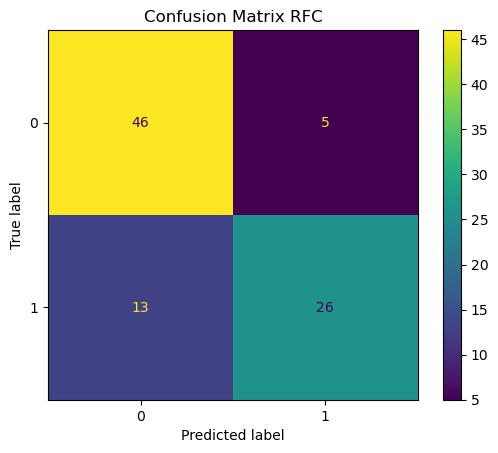

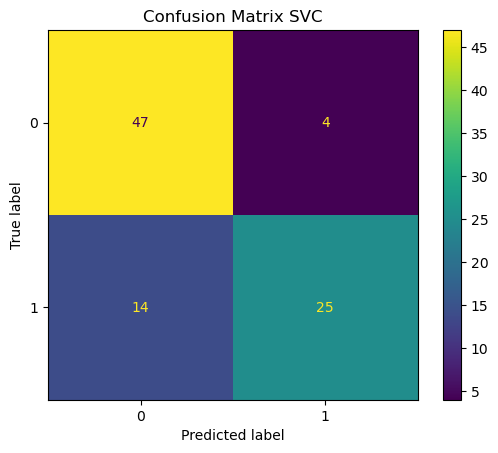

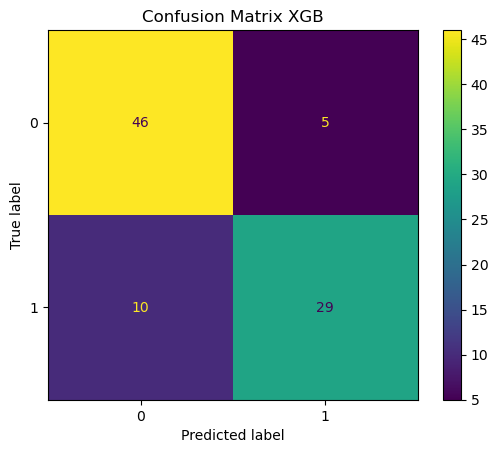

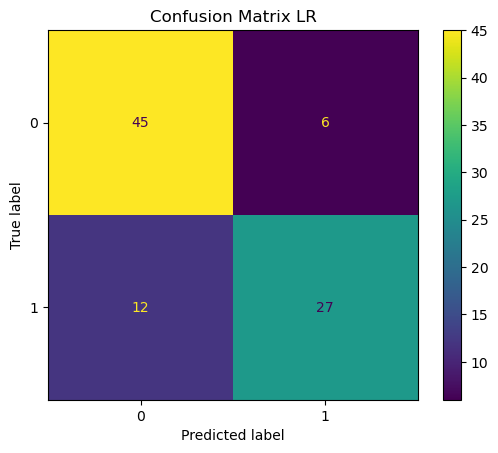

In [61]:
cm_rfc = ConfusionMatrixDisplay.from_predictions(y_val, y_hat_rfc)
plt.title('Confusion Matrix RFC')



cm_svc = ConfusionMatrixDisplay.from_predictions(y_val, y_hat_svc)
plt.title('Confusion Matrix SVC')


cm_xgb = ConfusionMatrixDisplay.from_predictions(y_val, y_hat_xgb)
plt.title('Confusion Matrix XGB')


cm_lr = ConfusionMatrixDisplay.from_predictions(y_val, y_hat_lr)
plt.title('Confusion Matrix LR')


plt.show()

In [62]:
fpr0, tpr0, thresh0 = roc_curve(y_val, grid_search_rfc.predict_proba(x_val)[:, 1], pos_label = 1)
fpr1, tpr1, thresh1 = roc_curve(y_val, grid_search_svc.predict_proba(x_val)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_val, grid_search_xgb.predict_proba(x_val)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_val, grid_search_lr.predict_proba(x_val)[:, 1], pos_label = 1)


In [63]:
auc_score0 = roc_auc_score(y_val, grid_search_rfc.predict_proba(x_val)[:, 1])
auc_score1 = roc_auc_score(y_val, grid_search_svc.predict_proba(x_val)[:, 1])
auc_score2 = roc_auc_score(y_val, grid_search_xgb.predict_proba(x_val)[:, 1])
auc_score3 = roc_auc_score(y_val, grid_search_lr.predict_proba(x_val)[:, 1])



print("RFC: ", auc_score0) 
print("SVC: ", auc_score1) 
print("XGB: ", auc_score2) 
print("LR: ", auc_score3) 



RFC:  0.8939165409753645
SVC:  0.8667672197083962
XGB:  0.8740573152337858
LR:  0.8999497234791353


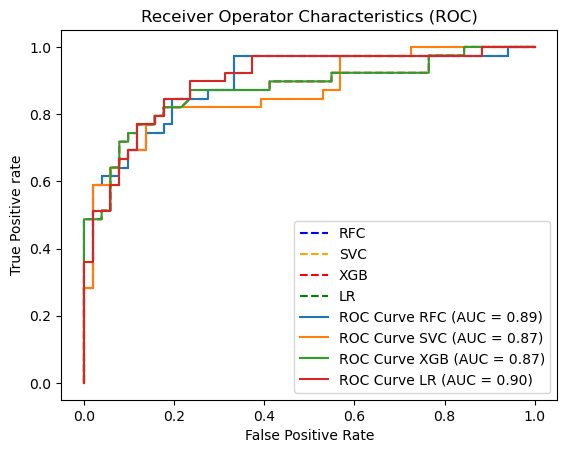

In [64]:
plt.plot(fpr0, tpr0, linestyle = "--", color = "blue", label = "RFC")
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "SVC")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "XGB")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "LR")


plt.plot(fpr0, tpr0, label='ROC Curve RFC (AUC = {:.2f})'.format(auc_score0))
plt.plot(fpr1, tpr1, label='ROC Curve SVC (AUC = {:.2f})'.format(auc_score1))
plt.plot(fpr2, tpr2, label='ROC Curve XGB (AUC = {:.2f})'.format(auc_score2))
plt.plot(fpr3, tpr3, label='ROC Curve LR (AUC = {:.2f})'.format(auc_score3))

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

# Testing time

In [65]:
df_test=pd.read_csv('/kaggle/input/titanic/test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [66]:
x_test=df_test.drop(['PassengerId','Name','Cabin','Ticket'], axis='columns')
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [74]:
y_hat_lr_test= grid_search_lr.best_estimator_.predict(x_test)

In [75]:
submission_df = pd.DataFrame(df_test["PassengerId"]) 

In [76]:
submission_df

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [77]:
submission_df["Survived"] = y_hat_lr_test

In [78]:
submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [79]:
submission_df.to_csv('submission_lr.csv', index=False)